In [32]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/ana/ironhack_coding/datasets/mental_health_in_tech.csv")

This dataset contains the following data:

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [5]:
# Assuring column names are all lower case and whitespaces are replace by underscores
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")


In [6]:
df.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [7]:
df.dtypes

timestamp                    object
age                           int64
gender                       object
country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [8]:
df.shape

(1259, 27)

In [9]:
df.isnull().sum()

timestamp                       0
age                             0
gender                          0
country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [10]:
# will drop the columns where the self-employed column has a value of NaN, since this info might be important for
# later analysis and the number of columns is very low

df.dropna(subset=['self_employed'], how='all', inplace=True)


#### Cleaning age column

In [11]:
# age's min and max are outliers and very humanily impossible
df.describe()

,age
count,1.241000e+03
mean,8.058021e+07
std,2.838665e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [12]:
#instead of using a function for outliers - which would calculate the outliers based on the standard deviation, 
# I will remove the ages that under 20 and above 75 years old. 
# I will assign NaN to the outliers and drop them 
df["age"] = df["age"].apply(lambda age: int(age) if (age > 20 and age < 75) else np.nan)

df["age"].min()
#df.gender_clean.apply(lambda x: re.sub(r"[m]$","male", x))


21.0

In [13]:
df["age"]

18      46.0
19      36.0
20      29.0
21      31.0
22      46.0
        ... 
1254    26.0
1255    32.0
1256    34.0
1257    46.0
1258    25.0
Name: age, Length: 1241, dtype: float64

In [14]:
df["age"].isnull().sum()

30

In [15]:
# dropping rows with NaN values
df.dropna(subset=['age'], how='all', inplace=True)
df["age"].isnull().sum()

0

In [16]:
# after rows being dropped
df.shape

(1211, 27)

In [17]:
# subgroups who are more likely to experience mental health problems
# prejudice against mental health -would different segments talk with their employees?
# relationship between menthal health support programmes and how people feel?
# 

In [18]:
# standardize column gender column

In [21]:
df["gender"].unique()

array(['male', 'female', 'm', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'cis male', 'woman', 'mal', 'male (cis)',
       'queer/she/they', 'non-binary', 'femake', 'make', 'nah', 'enby',
       'fluid', 'genderqueer', 'androgyne', 'agender', 'cis-female/femme',
       'guy (-ish) ^_^', 'male leaning androgynous', 'man', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'malr', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [24]:
#cleaning gender column making sure most of the values are within "male" and "female"
#the other values will be dropped for this analysis
#dropped other values
df["gender"] = df.gender.apply(lambda x: x.lower().strip())
df["gender"] = df.gender.apply(lambda x: re.sub(r"[m]$","male", x))
df["gender"] = df.gender.apply(lambda x: re.sub(r"[f]$","female", x))


df = df[(df["gender"] == "male") | (df["gender"] == "female")]

df["gender"].value_counts()



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

male      939
female    230
Name: gender, dtype: int64

### Calculate ratio

In [108]:
women = df[(df["gender"] == "female")]

In [114]:
women = women[["mental_health_consequence", "phys_health_consequence", "coworkers", "supervisor", "mental_health_interview", "phys_health_interview"]]

In [119]:
def count_col(x)

,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview
27,No,No,Yes,Yes,Maybe,Maybe
34,Maybe,No,Some of them,No,No,Maybe
45,No,No,Some of them,Yes,No,No
61,No,No,Yes,Yes,Maybe,Yes
66,No,No,Some of them,Yes,No,Maybe
68,Maybe,No,Some of them,No,No,Maybe
87,Yes,Maybe,Some of them,Some of them,No,No
88,Maybe,No,Some of them,Some of them,No,Maybe
94,Maybe,No,Some of them,Yes,No,Maybe
100,Yes,No,No,No,No,Maybe


In [ ]:
df = df[(df["gender"] == "male") | (df["gender"] == "female")]


In [146]:
ratio2 =df.groupby(["gender", "coworkers", "supervisor"]).agg({"gender":"count", "supervisor":"count", "coworkers":"sum"})

In [147]:
ratio2

gender  supervisor  \
gender coworkers    supervisor                         
female No           No                40          40   
                    Some of them      15          15   
                    Yes                2           2   
       Some of them No                43          43   
                    Some of them      57          57   
                    Yes               44          44   
       Yes          No                 1           1   
                    Some of them       5           5   
                    Yes               23          23   
male   No           No               146         146   
                    Some of them      28          28   
                    Yes               12          12   
       Some of them No               131         131   
                    Some of them     199         199   
                    Yes              249         249   
       Yes          No                 4           4   
                    Some of them      18          18   
                    Yes              152         152   

                                                                          coworkers  
gender coworkers    supervisor                                                       
female No           No            NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...  
                    Some of them                     NoNoNoNoNoNoNoNoNoNoNoNoNoNoNo  
                    Yes                                                        NoNo  
       Some of them No            Some of themSome of themSome of themSome of th...  
                    Some of them  Some of themSome of themSome of themSome of th...  
                    Yes           Some of themSome of themSome of themSome of th...  
       Yes          No                                                          Yes  
                    Some of them                                    YesYesYesYesYes  
                    Yes           YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...  
male   No           No            NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...  
                    Some of them  NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...  
                    Yes                                    NoNoNoNoNoNoNoNoNoNoNoNo  
       Some of them No            Some of themSome of themSome of themSome of th...  
                    Some of them  Some of themSome of themSome of themSome of th...  
                    Yes           Some of themSome of themSome of themSome of th...  
       Yes          No                                                 YesYesYesYes  
                    Some of them  YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...  
                    Yes           YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...

In [90]:
df.groupby(['gender'])['coworkers', 'mental_health_consequence'].sum()






,coworkers,mental_health_consequence
gender,,
female,YesSome of themSome of themYesSome of themSome...,NoMaybeNoNoNoMaybeYesMaybeMaybeYesMaybeMaybeMa...
male,YesSome of themSome of themSome of themSome of...,NoNoMaybeNoMaybeMaybeNoYesMaybeNoYesYesYesMayb...


In [25]:
# Men vs women
(df.groupby('gender').size()/df['gender'].count())*100


gender
female    19.674936
male      80.325064
dtype: float64

In [158]:
mental_health_consequence = df.groupby(["gender","mental_health_consequence"]).value_counts()

phys_health_consequence = df.groupby(["gender", "phys_health_consequence" ]).mean()

coworkers = df.groupby(["gender", "coworkers" ]).mean()

supervisor = df.groupby(["gender", "supervisor" ]).mean()

mental_health_interview = df.groupby(["gender", "supervisor" ]).mean()

phys_health_interview = df.groupby(["gender", "phys_health_interview"]).mean()


AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [177]:
mental_health_consequence = df.groupby("gender")["mental_health_consequence"].value_counts()
mental_health_consequence

gender  mental_health_consequence
female  Maybe                        100
        No                            66
        Yes                           64
male    No                           387
        Maybe                        350
        Yes                          202
Name: mental_health_consequence, dtype: int64

####  Gender vs perception/shame etc


mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

In [81]:
df["mental_health_consequence"].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [ ]:
# Do men and women have different attitutes towards talking about 
# mental health problems with their employer
# use percentages

In [34]:
plt.bar(mental_health_consequence["gender"])

TypeError: bar() missing 1 required positional argument: 'height'

In [79]:
mental_health_consequence


age
gender mental_health_consequence           
female Maybe                      31.110000
       No                         30.409091
       Yes                        31.187500
male   Maybe                      32.611429
       No                         32.173127
       Yes                        33.683168

In [125]:
df2 = df[["gender","mental_health_consequence", "phys_health_consequence", "coworkers", "supervisor", "mental_health_interview", "phys_health_interview"]]





In [201]:
#total women & men
df["gender"].value_counts()
total_women = 230 # better ways of doing this, but no time
total_men = 939

#only columns that have the same type of answers "Yes", "No", "Maybe"
consequence = df[["gender","mental_health_consequence","phys_health_consequence"]]
consequence_f = consequence[consequence["gender"]=="female"]
consequence_m = consequence[consequence["gender"]=="male"]


In [279]:

#Do you think that discussing a MENTAL health issue with your employer would have negative consequences? RATIO
cons_wo_mental = (consequence_f["mental_health_consequence"].value_counts()/total_women*100).sort_values()
cons_m_mental = (consequence_m["mental_health_consequence"].value_counts()/total_men*100).sort_values()


#phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative 
#consequences? RATIO

cons_wo_phy = (consequence_f["phys_health_consequence"].value_counts()/total_women*100).sort_values()
cons_m_phy = (consequence_m["phys_health_consequence"].value_counts()/total_men*100).sort_values()


In [280]:
cons_wo_phy

Yes       6.086957
Maybe    26.956522
No       66.956522
Name: phys_health_consequence, dtype: float64

In [281]:
cons_m_phy

Yes       4.046858
Maybe    20.234292
No       75.718850
Name: phys_health_consequence, dtype: float64

<Figure size 1080x720 with 0 Axes>

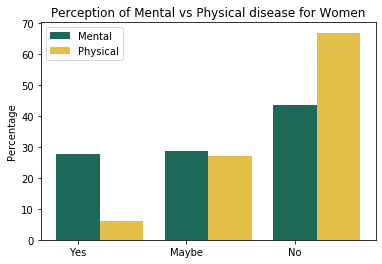

In [296]:
### plotting
#number of pairs of bars:
n = 3

#position of bars on x-axis

labels =["Yes", "Maybe","No"]

ind = np.arange(len(labels))

fig = plt.figure(figsize=(15, 10))

width = 0.4 #widht of the bars

#WOMEN - behaviour facing mental vs physical disease 
fig, ax = plt.subplots()
ax1 = ax.bar(ind,cons_wo_mental, width, label = "Mental", color="#1e6958" )
ax2 = ax.bar(ind + width, cons_wo_phy, width, label = "Physical", color = "#e3bf49")


# customising 
ax.set_ylabel('Percentage')
ax.set_title('Perception of Mental vs Physical disease for Women')

ax.set_xticks(ind)
ax.set_xticklabels(labels)


ax.legend()

plt.show()

#### Perception of physical vs mental disease in men
Do you think that discussing a physical health issue with your employer would have negative 

<Figure size 1080x720 with 0 Axes>

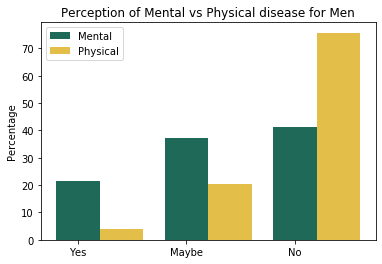

In [297]:
### plotting
#number of pairs of bars:
n = 3

#position of bars on x-axis

labels =["Yes", "Maybe","No"]

ind = np.arange(len(labels))

fig = plt.figure(figsize=(15, 10))

width = 0.4 #widht of the bars

#WOMEN - behaviour facing mental vs physical disease 
fig, ax = plt.subplots()
ax1 = ax.bar(ind,cons_m_mental, width, label = "Mental", color="#1e6958" )
ax2 = ax.bar(ind + width, cons_m_phy, width, label = "Physical", color = "#e3bf49")


# customising 
ax.set_ylabel('Percentage')
ax.set_title('Perception of Mental vs Physical disease for Men')

ax.set_xticks(ind)
ax.set_xticklabels(labels)


ax.legend()

plt.show()

### Interview

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

In [295]:

interview = df[["gender","mental_health_interview", "phys_health_interview"]]

interview_f = interview[interview["gender"]=="female"]
interview_m = interview[interview["gender"]=="male"]

#Would you bring up a mental issue with a potential employer in an interview? 
interview_wo_mental = (interview_f["mental_health_interview"].value_counts()/total_women*100).sort_values()
interview_m_mental = (interview_m["mental_health_interview"].value_counts()/total_men*100).sort_values()


#phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative 
#consequences? RATIO

interview_wo_phy = (interview_f["phys_health_interview"].value_counts()/total_women*100).sort_values()
interview_m_phy = (interview["phys_health_interview"].value_counts()/total_men*100).sort_values()



<Figure size 1080x720 with 0 Axes>

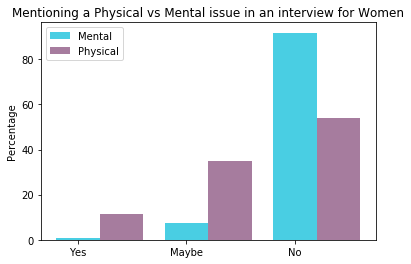

In [302]:
### plotting
#number of pairs of bars:
n = 3

#position of bars on x-axis

labels =["Yes", "Maybe","No"]

ind = np.arange(len(labels))

fig = plt.figure(figsize=(15, 10))

width = 0.4 #widht of the bars

#WOMEN - behaviour facing mental vs physical disease 
fig, ax = plt.subplots()
ax1 = ax.bar(ind,interview_wo_mental, width, label = "Mental", color="#49cee3" )
ax2 = ax.bar(ind + width, interview_wo_phy, width, label = "Physical", color = "#a67c9e")


# customising 
ax.set_ylabel('Percentage')
ax.set_title('Mentioning a Physical vs Mental issue in an interview for Women')

ax.set_xticks(ind)
ax.set_xticklabels(labels)


ax.legend()

plt.show()

<Figure size 1080x720 with 0 Axes>

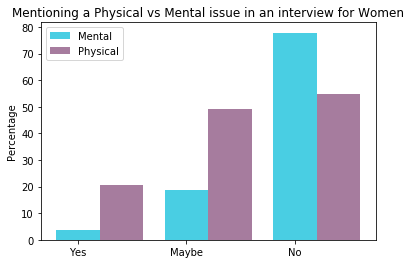

In [303]:
#number of pairs of bars:
n = 3

#position of bars on x-axis

labels =["Yes", "Maybe","No"]

ind = np.arange(len(labels))

fig = plt.figure(figsize=(15, 10))

width = 0.4 #widht of the bars

#WOMEN - behaviour facing mental vs physical disease 
fig, ax = plt.subplots()
ax1 = ax.bar(ind,interview_m_mental, width, label = "Mental", color="#49cee3" )
ax2 = ax.bar(ind + width, interview_m_phy, width, label = "Physical", color = "#a67c9e")


# customising 
ax.set_ylabel('Percentage')
ax.set_title('Mentioning a Physical vs Mental issue in an interview for Women')

ax.set_xticks(ind)
ax.set_xticklabels(labels)


ax.legend()

plt.show()

### Speaking to  coworkers /supervisor

In [307]:
speaking = df[["gender","coworkers", "supervisor"]]

speaking_f = speaking[speaking["gender"]=="female"]
speaking_m = speaking[speaking["gender"]=="male"]

#Would you speak to a co-worker or a supervisor - WOMEN?
coworker_wo = (speaking_f["coworkers"].value_counts()/total_women*100).sort_values()
supervisor_wo = (speaking_f["supervisor"].value_counts()/total_women*100).sort_values()

# Would you speak to a co-worker or a supervisor - MEN ?
coworker_m = (speaking_m["coworkers"].value_counts()/total_women*100).sort_values()
supervisor_m = (speaking_m["supervisor"].value_counts()/total_women*100).sort_values()


<Figure size 1080x720 with 0 Axes>

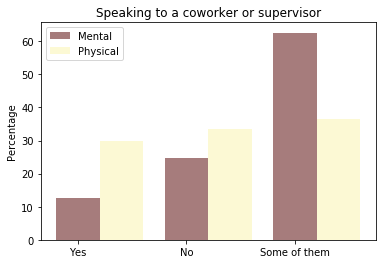

In [314]:
#number of pairs of bars:
n = 3

#position of bars on x-axis

labels =["Yes", "No","Some of them"]

ind = np.arange(len(labels))

fig = plt.figure(figsize=(15, 10))

width = 0.4 #widht of the bars

# WOMEN - SPEAKING TO COWORKER or SUPERVISOR
fig, ax = plt.subplots()
ax1 = ax.bar(ind, coworker_wo, width, label = "Mental", color="#a67c7c" )
ax2 = ax.bar(ind + width, supervisor_wo , width, label = "Physical", color = "#fcf9d4")


# customising 
ax.set_ylabel('Percentage')
ax.set_title('Speaking to a coworker or supervisor')

ax.set_xticks(ind)
ax.set_xticklabels(labels)


ax.legend()

plt.show()

<Figure size 1080x720 with 0 Axes>

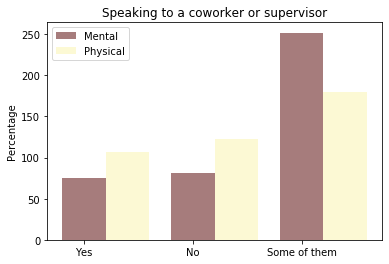

In [315]:
#number of pairs of bars:
n = 3

#position of bars on x-axis

labels =["Yes", "No","Some of them"]

ind = np.arange(len(labels))

fig = plt.figure(figsize=(15, 10))

width = 0.4 #widht of the bars

# MEN- SPEAKING TO COWORKER or SUPERVISOR
fig, ax = plt.subplots()
ax1 = ax.bar(ind, coworker_m, width, label = "Mental", color="#a67c7c" )
ax2 = ax.bar(ind + width, supervisor_m , width, label = "Physical", color = "#fcf9d4")


# customising 
ax.set_ylabel('Percentage')
ax.set_title('Speaking to a coworker or supervisor')

ax.set_xticks(ind)
ax.set_xticklabels(labels)


ax.legend()